# **Calculating molecular fingerprints using padelpy**

# **Install padelpy**

In [6]:
! pip install padelpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 91.5 MB/s eta 0:00:00


# **Prepare fingerprint XML**

### **Download fingerprint XML files**

In [7]:
! wget https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
! unzip fingerprints_xml.zip

--2025-12-01 11:51:17--  https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip [following]
--2025-12-01 11:51:17--  https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10871 (11K) [application/zip]
Saving to: ‘fingerprints_xml.zip’

fingerprints_xml.zi 100%[===================>]  10.62K  --.-KB/s    in 0s      

2025-12-01 11:51:17 (27.7 MB/s) - ‘fingerprints_xml.zip’ saved [10871/10871]

Archive:  fingerprints_xm

### **List and sort fingerprint XML files**

In [8]:
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [9]:
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

### **Create a dictionary**

In [10]:
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml',
 'Substructure': 'SubstructureFingerprinter.xml'}

In [11]:
fp['AtomPairs2D']

'AtomPairs2DFingerprinter.xml'

# **Load BACE1 dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
from sys import path as path
import os
from pathlib import Path

In [24]:
DRIVE_DIR = Path("/content/drive/My Drive/Data Science and ML courses/CADD/Data/")

In [ ]:
location = DRIVE_DIR / "Beta_Secretase1.csv"
df_twoclass.to_csv(location, index=False)

print(f"Two class dataset saved to: {location}")

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/drive/My Drive/Data Science and ML courses/CADD/Data/Beta_Secretase1_twoclasses_dataset_correct.csv")
df.head()

,molecule_chembl_id,smiles,pIC50,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL3969403,CC1(C)C(N)=N[C@](C)(c2cc(NC(=O)c3ccc(C#N)cn3)c...,12.698970,Active,429.477,2.12408,2.0,7.0
1,CHEMBL3937515,COc1cnc(C(=O)Nc2ccc(F)c([C@]3(C)CS(=O)(=O)C(C)...,12.045757,Active,435.481,1.65600,2.0,8.0
2,CHEMBL3949213,C[C@@]1(c2cc(NC(=O)c3ccc(C#N)cn3)ccc2F)CS(=O)(...,12.000000,Active,455.515,2.65828,2.0,7.0
3,CHEMBL3955051,CC1(C)C(N)=N[C@](C)(c2cc(NC(=O)c3cnc(C(F)F)cn3...,11.744727,Active,455.462,2.58500,2.0,7.0
4,CHEMBL3936264,C[C@@]1(c2cc(NC(=O)c3ccc(OC(F)F)cn3)ccc2F)CS(=...,11.244125,Active,442.419,2.07520,2.0,7.0


In [4]:
df.tail(5)

,molecule_chembl_id,smiles,pIC50,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
2334,CHEMBL5908501,C[C@@]1(c2cc(NC(=O)c3cnc(OCC(F)(F)F)cn3)ccc2F)...,1.0,Inactive,464.383,2.0349,2.0,9.0
2335,CHEMBL5804713,C[C@@]1(c2cc(NC(=O)c3ccc(F)cn3)cc(F)c2F)Cn2nnc...,1.0,Inactive,401.352,1.9770,2.0,7.0
2336,CHEMBL5758820,NC1=N[C@](CF)(c2cc(NC(=O)c3ccc(F)cn3)ccc2F)Cn2...,1.0,Inactive,401.352,1.7875,2.0,7.0
2337,CHEMBL5983491,C[C@@]1(c2cc(NC(=O)c3nn(C(F)F)cc3Cl)ccc2F)Cn2n...,1.0,Inactive,438.801,2.5488,2.0,8.0
2338,CHEMBL5838638,NC1=N[C@@](CF)(c2cc(NC(=O)c3ccc(F)cn3)ccc2F)Cn...,1.0,Inactive,401.352,1.7875,2.0,7.0


In [5]:
df.shape

(2339, 8)

In [ ]:


df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/HCV_NS5B_Curated.csv')
df.head(2)

,CMPD_CHEMBLID,CANONICAL_SMILES,STANDARD_TYPE,RELATION,STANDARD_VALUE,STANDARD_UNITS,pIC50,PROTEIN_ACCESSION,PREF_NAME,DOC_CHEMBLID,ASSAY_SRC_DESCRIPTION,DESCRIPTION,PUBMED_ID,JOURNAL,YEAR,VOLUME,ISSUE,FIRST_PAGE,MOLWEIGHT,ALOGP,PSA,NUM_RO5_VIOLATIONS,Activity
0,CHEMBL179256,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3F)n2C4CCCCC4,IC50,=,1.4,nM,8.853872,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1142688,Scientific Literature,Inhibitory concentration against RNA dependent...,15743173.0,J. Med. Chem.,2005,48.0,5.0,1314.0,354.37,4.93,75.35,0,Active
1,CHEMBL204350,CC(C)(C)CCN1[C@H](C(=C(C1=O)C2=NS(=O)(=O)c3ccc...,IC50,=,1.7,nM,8.769551,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1146957,Scientific Literature,Inhibition of HCV NS5B RNA dependent RNA polym...,16455253.0,Bioorg. Med. Chem. Lett.,2006,16.0,8.0,2205.0,419.54,2.37,107.45,0,Active


In [ ]:
df.tail(2)

,CMPD_CHEMBLID,CANONICAL_SMILES,STANDARD_TYPE,RELATION,STANDARD_VALUE,STANDARD_UNITS,pIC50,PROTEIN_ACCESSION,PREF_NAME,DOC_CHEMBLID,ASSAY_SRC_DESCRIPTION,DESCRIPTION,PUBMED_ID,JOURNAL,YEAR,VOLUME,ISSUE,FIRST_PAGE,MOLWEIGHT,ALOGP,PSA,NUM_RO5_VIOLATIONS,Activity
576,CHEMBL175454,OC(=O)c1ccc2c(c1)nc(c3ccccn3)n2c4ccccc4,IC50,=,360000.0,nM,3.443697,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1149223,Scientific Literature,Inhibitory activity against NS5B polymerase of...,14684311.0,Bioorg. Med. Chem. Lett.,2004,14.0,1.0,119.0,315.33,3.96,68.01,0,Inactive
577,CHEMBL369640,CC(C)n1c(nc2cc(ccc12)C(=O)O)c3ccccn3,IC50,=,408000.0,nM,3.389340,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1149223,Scientific Literature,Inhibitory activity against NS5B polymerase of...,14684311.0,Bioorg. Med. Chem. Lett.,2004,14.0,1.0,119.0,281.31,3.11,68.01,0,Inactive


# **Prepare data subset as input to PaDEL**

In [12]:
df2 = pd.concat( [df['smiles'],df['molecule_chembl_id']], axis=1 )
df2.to_csv('molecule.smi', sep='\t', index=False, header=False)
df2

,smiles,molecule_chembl_id
0,CC1(C)C(N)=N[C@](C)(c2cc(NC(=O)c3ccc(C#N)cn3)c...,CHEMBL3969403
1,COc1cnc(C(=O)Nc2ccc(F)c([C@]3(C)CS(=O)(=O)C(C)...,CHEMBL3937515
2,C[C@@]1(c2cc(NC(=O)c3ccc(C#N)cn3)ccc2F)CS(=O)(...,CHEMBL3949213
3,CC1(C)C(N)=N[C@](C)(c2cc(NC(=O)c3cnc(C(F)F)cn3...,CHEMBL3955051
4,C[C@@]1(c2cc(NC(=O)c3ccc(OC(F)F)cn3)ccc2F)CS(=...,CHEMBL3936264
...,...,...
2334,C[C@@]1(c2cc(NC(=O)c3cnc(OCC(F)(F)F)cn3)ccc2F)...,CHEMBL5908501
2335,C[C@@]1(c2cc(NC(=O)c3ccc(F)cn3)cc(F)c2F)Cn2nnc...,CHEMBL5804713
2336,NC1=N[C@](CF)(c2cc(NC(=O)c3ccc(F)cn3)ccc2F)Cn2...,CHEMBL5758820
2337,C[C@@]1(c2cc(NC(=O)c3nn(C(F)F)cc3Cl)ccc2F)Cn2n...,CHEMBL5983491


# **Calculate descriptors**

There are 12 fingerprint types in PaDEL. To calculate all 12, make sure to make adjustments to the ***descriptortypes*** input argument to any of the ones in the ***fp*** dictionary variable as shown above, e.g. *SubstructureFingerprintCount.xml*

In [13]:
fp

{'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml',
 'Substructure': 'SubstructureFingerprinter.xml'}

In [14]:
fp['PubChem']

'PubchemFingerprinter.xml'

In [15]:
from padelpy import padeldescriptor

fingerprint = 'Substructure'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #Substructure.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                d_file=fingerprint_output_file, #'Substructure.csv'
                #descriptortypes='SubstructureFingerprint.xml',
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

# **Display calculated fingerprints**

In [16]:
descriptors = pd.read_csv(fingerprint_output_file)
descriptors

,Name,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,...,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307
0,CHEMBL3969403,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
1,CHEMBL3937515,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
2,CHEMBL3949213,1,1,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
3,CHEMBL3955051,1,0,0,0,0,0,0,0,1,...,0,0,1,1,1,0,0,0,0,1
4,CHEMBL3936264,1,0,0,0,0,0,0,0,1,...,0,0,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,CHEMBL5908501,1,0,0,0,0,0,0,0,1,...,0,0,1,1,1,0,0,0,0,1
2335,CHEMBL5804713,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
2336,CHEMBL5758820,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,0,0,0,0,1
2337,CHEMBL5983491,1,0,0,0,0,0,0,0,1,...,0,0,1,1,1,0,0,0,0,1


In [26]:
location = DRIVE_DIR / "bace1_raw_descriptors.csv"
descriptors.to_csv(location, index=False)

# **Build a Random Forest Model**

In [29]:
X = descriptors.drop('Name', axis=1)


In [28]:
y = df['bioactivity_class']

### **Remove low variance features**

In [30]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,SubFP1,SubFP2,SubFP3,SubFP4,SubFP9,SubFP12,SubFP14,SubFP16,SubFP18,SubFP23,...,SubFP135,SubFP137,SubFP143,SubFP151,SubFP171,SubFP172,SubFP181,SubFP184,SubFP287,SubFP288
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,1,1,1
1,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,1,1,1,0
2,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,1,1,1
3,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,1,1,0
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,1,1,1,0
2335,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,1,1,0
2336,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,1,1,0
2337,1,0,0,0,1,0,0,0,0,0,...,1,1,0,0,1,1,1,1,1,0


In [31]:
location2 = DRIVE_DIR / "bace1_descriptors_rm_lowvariance.csv"
X.to_csv(location2, index=False)

### **Data splitting**

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train.shape, X_test.shape

((1871, 26), (468, 26))

### **Model building**

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef

model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

### **Apply model to make prediction**

In [35]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

### **Calculate model performance metrics**

In [36]:
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_train

np.float64(0.9659071458827269)

In [37]:
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_test

np.float64(0.8012155014982029)

### **Cross-validation**

In [38]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=500, random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
cv_scores

array([0.928     , 0.93582888, 0.90106952, 0.93582888, 0.93048128])

In [39]:
mcc_cv = cv_scores.mean()
mcc_cv

np.float64(0.9262417112299465)

In [40]:
model_name = pd.Series(['Random forest'], name='Name')
mcc_train_series = pd.Series(mcc_train, name='MCC_train')
mcc_cv_series = pd.Series(mcc_cv, name='MCC_cv')
mcc_test_series = pd.Series(mcc_test, name='MCC_test')

performance_metrics = pd.concat([model_name, mcc_train_series, mcc_cv_series, mcc_test_series], axis=1)
performance_metrics

,Name,MCC_train,MCC_cv,MCC_test
0,Random forest,0.965907,0.926242,0.801216


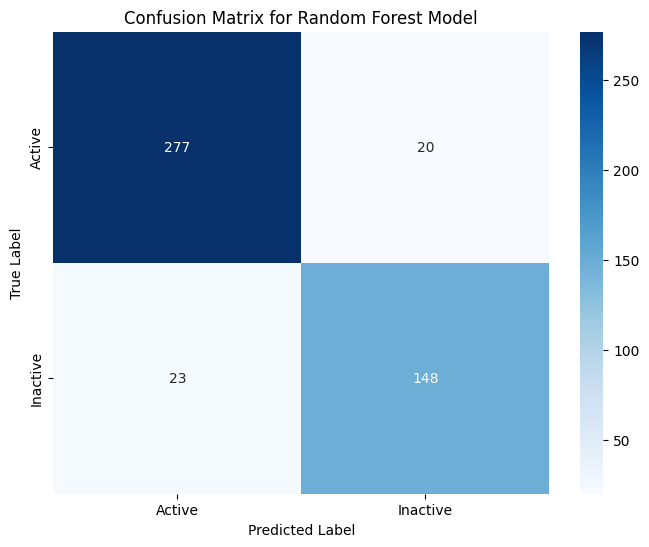

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Get class labels
class_labels = y.unique()

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The confusion matrix above shows the performance of the Random Forest model on the test set.

*   **True Positives (TP)**: The number of 'Active' compounds correctly predicted as 'Active'.
*   **True Negatives (TN)**: The number of 'Inactive' compounds correctly predicted as 'Inactive'.
*   **False Positives (FP)**: The number of 'Inactive' compounds incorrectly predicted as 'Active'.
*   **False Negatives (FN)**: The number of 'Active' compounds incorrectly predicted as 'Inactive'.

This visualization helps to understand the types of errors the model is making.

/tmp/ipython-input-2674233962.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(cv_scores)), y=cv_scores, palette='viridis')


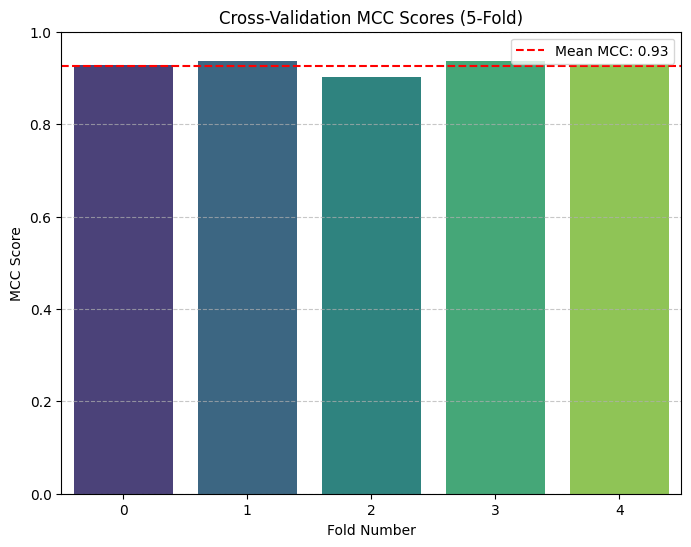

In [43]:
import numpy as np

# Assuming cv_scores and mcc_cv are available from previous execution

plt.figure(figsize=(8, 6))
sns.barplot(x=np.arange(len(cv_scores)), y=cv_scores, palette='viridis')
plt.axhline(y=mcc_cv, color='r', linestyle='--', label=f'Mean MCC: {mcc_cv:.2f}')
plt.title('Cross-Validation MCC Scores (5-Fold)')
plt.xlabel('Fold Number')
plt.ylabel('MCC Score')
plt.ylim(0, 1) # MCC scores are between -1 and 1
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This bar chart displays the Matthews Correlation Coefficient (MCC) for each fold during the 5-fold cross-validation. The red dashed line indicates the mean MCC score across all folds. This visualization helps to assess the stability and consistency of the model's performance on different subsets of the training data.

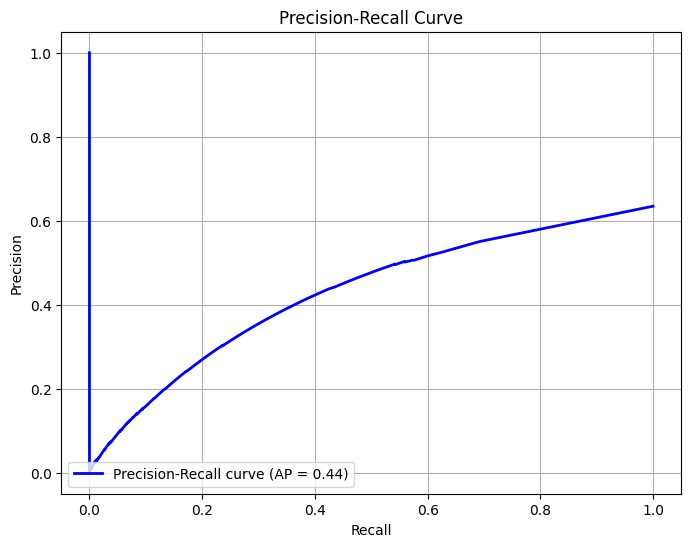

In [42]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Map 'Active' to 1 and 'Inactive' to 0 for precision_recall_curve
y_test_numeric = y_test.map({'Inactive': 0, 'Active': 1})

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test_numeric, y_prob)

# Compute Average Precision Score
aps = average_precision_score(y_test_numeric, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {aps:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

The Precision-Recall curve shows the trade-off between precision and recall for different thresholds. The **Average Precision (AP) score** summarizes the Precision-Recall curve and is a good metric for evaluating models on imbalanced datasets. A higher AP score indicates better performance.